In [1]:
import tensorflow as tf
from service.client import BertClient
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import seaborn as sns

/home/maybe/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Run the services from here
# https://github.com/hanxiao/bert-as-service

ec = BertClient()

the server at localhost:5555 returns the following config:
                        client	=	84c5542f-bd8a-4516-8b31-772db2b32932
                     model_dir	=	../model/uncased_L-12_H-768_A-12
                   max_seq_len	=	25                            
                    num_worker	=	4                             
                max_batch_size	=	256                           
                          port	=	5555                          
            tensorflow_version	=	1.10.0                        
                python_version	=	3.6.0 |Anaconda custom (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
                   server_time	=	2018-11-16 10:55:33.771656    
you should NOT see this message multiple times! if you see it appears repeatedly, please consider moving "BertClient()" out of the loop.


In [3]:
enc_1 = ec.encode(['i want to play basketball'])

In [4]:
enc_1.shape

(1, 768)

In [5]:
# messages = ['i want to play basketball', 'i would love to play badminition', 'i want to go for swimming', 'football is my favourite sport', 'i like water sports', 'i would like to eat chicken','chicken is my favourite','will it rain today']
messages = ['cat', 'dog','lion','tiger','basketball','football','coffee','burger','microsoft','google']
# messages = ['猫', '狗','狮子','老虎','篮球','足球','咖啡','汉堡包']

In [6]:
embeddings = ec.encode(messages)

In [7]:
new_corr = np.zeros((10,768), dtype=float)
for i, val in enumerate(embeddings):
#     print(val)
    norm = val / np.linalg.norm(val)
    new_corr[i] = norm

In [8]:
new_corr

array([[-2.75973864e-02,  5.61796036e-03,  3.02815568e-02, ...,
        -2.25936659e-02,  3.74684157e-03,  1.61824320e-02],
       [-9.96664725e-03,  9.93663631e-03,  1.43453656e-02, ...,
        -2.89362594e-02, -8.77566263e-03,  1.14098676e-02],
       [-2.66462229e-02,  2.28086319e-05,  4.14429186e-03, ...,
        -1.50235109e-02,  1.06803025e-03, -7.82127026e-03],
       ...,
       [ 1.47399458e-03, -8.30284227e-03,  1.22794993e-02, ...,
         9.88650601e-03, -8.16378091e-03, -2.43669376e-03],
       [-4.49160896e-02, -2.01838743e-02, -7.77354173e-04, ...,
        -1.81111246e-02,  1.22765999e-03,  1.73417144e-02],
       [-8.10380466e-03, -2.26607490e-02,  1.12582901e-02, ...,
        -1.85637753e-02, -3.07636661e-03,  1.70211513e-02]])

In [9]:
def plot_similarity(labels, features, rotation):
    corr = np.inner(features, features)
    sns.set(font_scale=0.9)
#     sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
    g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      annot=True,
      cmap="rainbow")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")

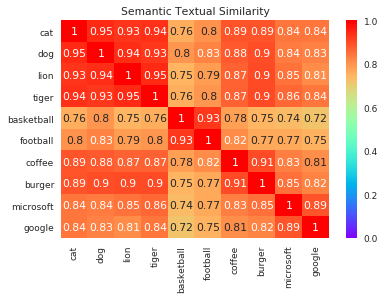

In [10]:
plot_similarity(messages, new_corr, 90)

In [11]:
messages = ['i want to learn chinese', 'please teach me chinese','can you tech me chinese language','translate this please',
          'translate into chinese','how do i say it in chinese', 'wall street journal','bank of America']

In [12]:
embeddings = ec.encode(messages)

In [13]:
new_corr = np.zeros((8,768), dtype=float)
for i, val in enumerate(embeddings):
#     print(val)
    norm = val / np.linalg.norm(val)
    new_corr[i] = norm

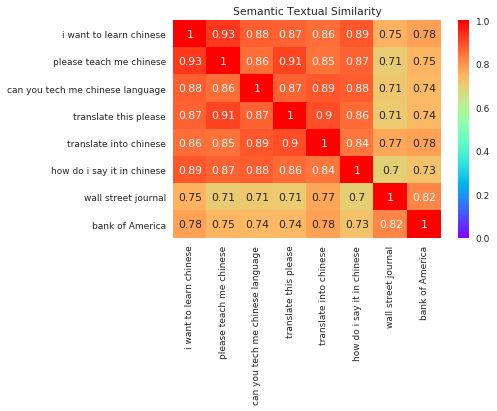

In [14]:
plot_similarity(messages, new_corr, 90)